In [33]:
import pandas as pd
import yfinance as yf
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Obtenção de dados da Apple
aapl = web.get_data_yahoo("AAPL")

In [35]:
print(aapl.iloc[0, 0])

33.95750045776367


In [36]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-17,33.957500,33.775002,33.775002,33.930000,88792800.0,32.035347
2017-02-21,34.187500,33.994999,34.057499,34.174999,98028800.0,32.266670
2017-02-22,34.279999,34.027500,34.107498,34.277500,83347600.0,32.363438
2017-02-23,34.369999,34.075001,34.345001,34.132500,83152800.0,32.226536
2017-02-24,34.165001,33.820000,33.977501,34.165001,87106400.0,32.257221


In [37]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-10,175.479996,171.550003,174.139999,172.119995,90865900.0,172.119995
2022-02-11,173.080002,168.039993,172.330002,168.639999,98566000.0,168.639999
2022-02-14,169.580002,166.559998,167.369995,168.880005,86062800.0,168.880005
2022-02-15,172.949997,170.250000,170.970001,172.789993,64286300.0,172.789993
2022-02-16,173.335007,170.050003,171.850006,173.184998,43556329.0,173.184998


In [38]:
# quantidade de linhas e colunas do dataframe
aapl.shape

(1259, 6)

In [39]:
# Show summary statistics of a DataFrame
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,79.090935,77.400024,78.228402,78.284321,1.202933e+08,77.053129
std,43.269216,42.225298,42.750123,42.767658,5.553652e+07,43.230603
min,33.957500,33.775002,33.775002,33.930000,4.100000e+07,32.035347
25%,43.779999,43.217501,43.520000,43.561251,8.345415e+07,41.786488
50%,55.747501,54.482498,55.237499,55.257500,1.053580e+08,53.675632
75%,121.800003,118.834999,120.340000,120.415001,1.406456e+08,119.515808
max,182.940002,179.119995,182.630005,182.009995,4.265100e+08,181.778397


In [46]:
# select all the price information of Apple in 2018.
aapl_2018 = aapl.loc['2018-01-01':'2018-12-31']

In [51]:
# print the opening price of the first row
print(aapl_2018.iloc[0, 0])

43.07500076293945


In [52]:
# print the opening price of the last row
print(aapl_2018.iloc[-1, 0])

39.84000015258789


<AxesSubplot:xlabel='Date'>

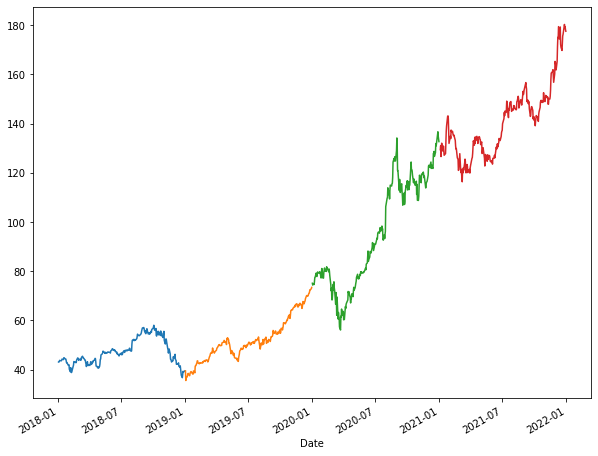

In [54]:
plt.figure(figsize=(10, 8))
aapl.loc['2018-01-01':'2018-12-31', 'Close'].plot()
aapl.loc['2019-01-01':'2019-12-31', 'Close'].plot()
aapl.loc['2020-01-01':'2020-12-31', 'Close'].plot()
aapl.loc['2021-01-01':'2021-12-31', 'Close'].plot()

In [55]:
#Create a new column PriceDiff in the DataFrame aapl
aapl['PriceDiff'] = aapl['Close'].shift(-1) - aapl['Close']

In [58]:
#Run this code to display the price difference of Apple on 2018-01-05
aapl['PriceDiff'].loc['2018-01-05']

-0.16249847412109375

In [59]:
#Create a new column Return in the DataFrame aapl
aapl['Return'] = aapl['PriceDiff'] / aapl['Close']

In [60]:
#Run this code to print the return on 2018-01-05
print(aapl['Return'].loc['2018-01-05'])

-0.0037142508370535715


In [61]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

aapl['Direction'] = [1 if aapl['PriceDiff'].loc[ei] > 0 else 0 for ei in aapl.index ]

In [62]:
# Run the following code to show the price difference on 2018-01-05
print('Price difference on {} is {}. direction is {}'.format('2018-01-05', aapl['PriceDiff'].loc['2018-01-05'], aapl['Direction'].loc['2018-01-05']))

Price difference on 2018-01-05 is -0.16249847412109375. direction is 0


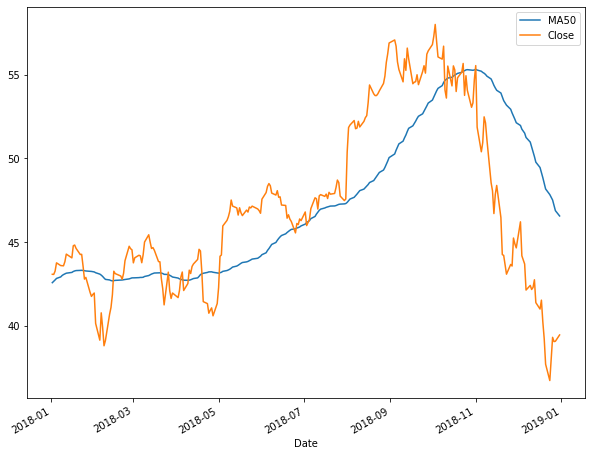

In [64]:
aapl['ma50'] = aapl['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
aapl['ma50'].loc['2018-01-01':'2018-12-31'].plot(label='MA50')
aapl['Close'].loc['2018-01-01':'2018-12-31'].plot(label='Close')
plt.legend()
plt.show()

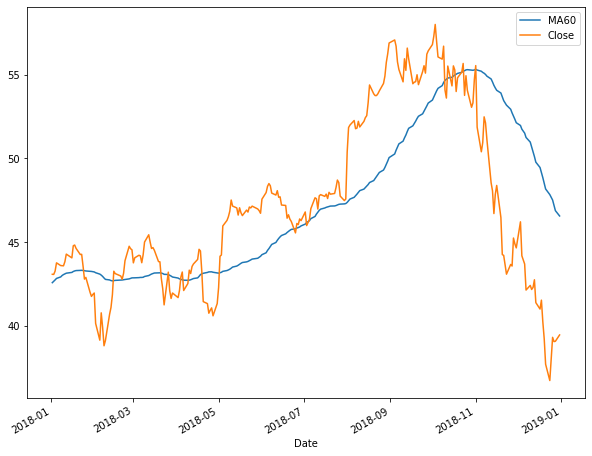

In [65]:
aapl['ma60'] = aapl['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
aapl['ma60'].loc['2018-01-01':'2018-12-31'].plot(label='MA60')
aapl['Close'].loc['2018-01-01':'2018-12-31'].plot(label='Close')
plt.legend()
plt.show()

### 1. Munging the stock data and add two columns - MA10 and MA50

In [ ]:
# Obtenção de dados da Apple

aapl = web.get_data_yahoo("AAPL")

#import Apple stock data, add two columns - MA10 and MA50

#use dropna to remove any "Not a Number" data

aapl['MA10'] = aapl['Close'].rolling(10).mean()
aapl['MA50'] = aapl['Close'].rolling(50).mean()
aapl = aapl.dropna()
aapl.head()

In [67]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
#Adicione uma nova coluna "Ações", se MA10>MA50, denotar como 1 (comprar uma ação), caso contrário, denotar como 0 (não fazer nada)

aapl['Shares'] = [1 if aapl.loc[x, 'MA10']>aapl.loc[x, 'MA50'] else 0 for x in aapl.index]

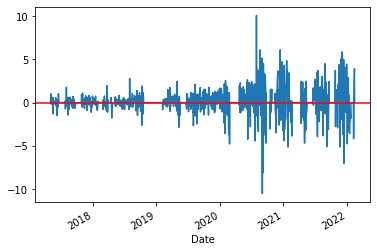

In [68]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#Adicione uma nova coluna "Lucro" usando a Compreensão da Lista, para qualquer linha em fb, se Ações=1, o lucro é calculado como o preço de fechamento

#tomorrow - the close price of today. Otherwise the profit is 0.
#amanhã - o preço de fechamento de hoje. Caso contrário, o lucro é 0.

#Plot a graph to show the Profit/Loss

#Plotar um gráfico para mostrar o lucro/prejuízo

aapl['Close1'] = aapl['Close'].shift(-1)
aapl['Profit'] = [aapl.loc[ei, 'Close1'] - aapl.loc[ei, 'Close'] if aapl.loc[ei, 'Shares']==1 else 0 for ei in aapl.index]
aapl['Profit'].plot()
plt.axhline(y=0, color='red')

In [69]:
#Use .cumsum() to calculate the accumulated wealth over the period
#Use .cumsum() para calcular a riqueza acumulada no período

aapl['wealth'] = aapl['Profit'].cumsum()
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2022-02-10,175.479996,171.550003,174.139999,172.119995,90865900.0,172.119995,173.573999,172.1204,1,168.639999,-3.479996,70.367489
2022-02-11,173.080002,168.039993,172.330002,168.639999,98566000.0,168.639999,173.404999,172.1978,1,168.880005,0.240005,70.607494
2022-02-14,169.580002,166.559998,167.369995,168.880005,86062800.0,168.880005,172.814999,172.3002,1,172.789993,3.909988,74.517483
2022-02-15,172.949997,170.250000,170.970001,172.789993,64286300.0,172.789993,172.632999,172.5192,1,172.899994,0.110001,74.627483
2022-02-16,173.335007,170.050003,171.850006,172.899994,45498638.0,172.899994,172.338998,172.6708,0,NaN,0.000000,74.627483


Text(0.5, 1.0, 'Total money you win is 74.62748336791992')

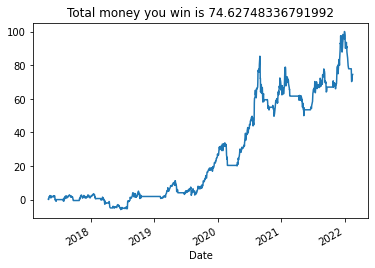

In [70]:
#plot the wealth to show the growth of profit over the period
#plotar a riqueza para mostrar o crescimento do lucro ao longo do período

aapl['wealth'].plot()
plt.title('Total money you win is {}'.format(aapl.loc[aapl.index[-2], 'wealth']))